# Cleaning the data

We must first go through each attribute in every table and analyse them for anny outliers or null values.

## Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

# Load dataframes
awards_players = pd.read_csv('../data/awards_players.csv')
coaches = pd.read_csv('../data/coaches.csv')
players_teams = pd.read_csv('../data/players_teams.csv')
players = pd.read_csv('../data/players.csv')
series_post = pd.read_csv('../data/series_post.csv')
teams_post = pd.read_csv('../data/teams_post.csv')
teams = pd.read_csv('../data/teams.csv')

## Analyse table Players

We analyse the attributes of the table players.

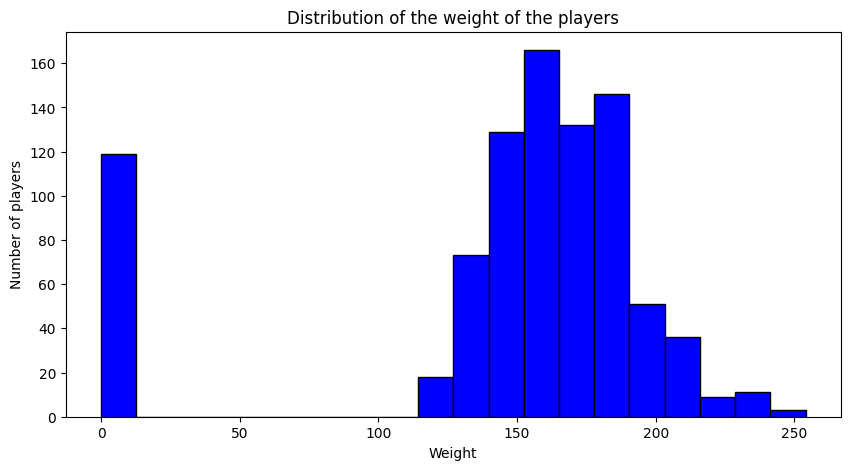

In [2]:
# make an histogram to show the distribution of the weight of the players
plt.figure(figsize=(10, 5))
plt.hist(players['weight'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the weight of the players')
plt.xlabel('Weight')
plt.ylabel('Number of players')
plt.show()

We must ignore couches (since they all have weight 0)

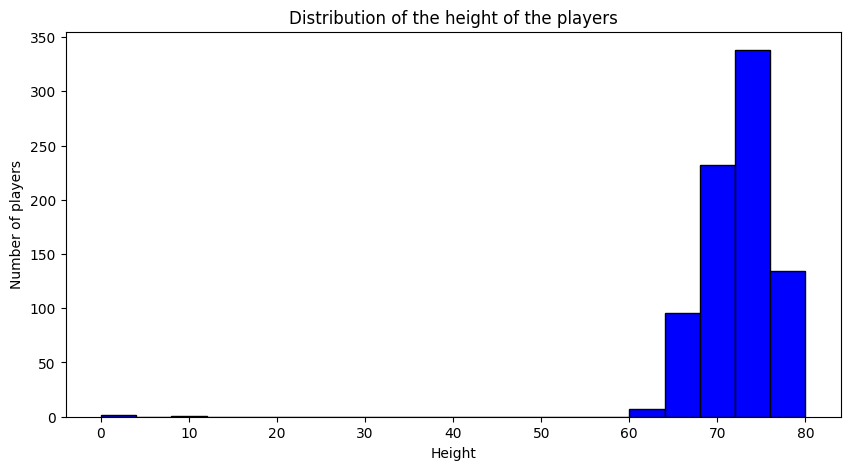

In [3]:
players = players[(players['pos'].notnull()) & (~players['bioID'].isin(coaches['coachID'].values))]

# make a histogram to show the distribution of the height of the players
plt.figure(figsize=(10, 5))
plt.hist(players['height'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the height of the players')
plt.xlabel('Height')
plt.ylabel('Number of players')
plt.show()


We see there is still unexpected values in the data. 

Let's test the same thing for weight.

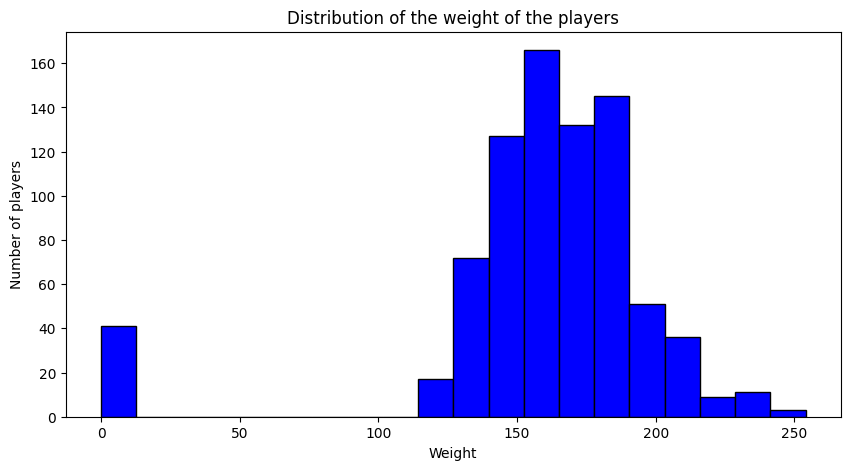

In [4]:
# make a histogram to show the distribution of the weight of the players
plt.figure(figsize=(10, 5))
plt.hist(players['weight'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the weight of the players')
plt.xlabel('Weight')
plt.ylabel('Number of players')
plt.show()

There is players with 0 weight in the data. To fix the height and weight of the players with invalid height or weight we do the following:

1. We calculate the average BMI of the players with height and weight within expected boundaries
2. We calculate the height of the players with incorrect height but correct weight
3. We calculate the weight of the players with incorrect weight but correct height

In [5]:
## calculate the BMI of the players, note the weight is in pounds and the height is in inches
players['bmi'] = players['weight'] / (players['height'] ** 2) * 703

# remove the outliers
temp = players[players['weight'] > 100]
temo = temp[temp['height'] > 50]

# get the average BMI of the players with correct height and weight
average_bmi = temp['bmi'].mean()

# fix the height of the players with only incorrect height by calculating the height based on the average BMI and the players weight
players.loc[
    (players['height'] < 50) & (players['weight'] > 100), 
    'height'
] = (players['weight'] / (average_bmi * 703)) ** 0.5

# fix the weight of the players with only incorrect weight by calculating the weight based on the average BMI and the players height
players.loc[
    (players['weight'] < 100) & (players['height'] > 50), 
    'weight'
] = players['height'] ** 2 * average_bmi / 703

C:\Users\marco\AppData\Local\Temp\ipykernel_14660\1482397656.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[146.5719525  201.28594551 206.68935489 195.95410446 146.5719525
 155.8758362  201.28594551 206.68935489 180.38799134 201.28594551
 160.63513056 190.69383175 190.69383175 175.34242364 175.34242364
 201.28594551 170.36842428 195.95410446 180.38799134 175.34242364
 185.50512738 206.68935489 212.1643326  190.69383175 206.68935489
 195.95410446 206.68935489 190.69383175 185.50512738 190.69383175
 175.34242364 195.95410446 212.1643326  185.50512738 185.50512738
 185.50512738 201.28594551 185.50512738 206.68935489]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  players.loc[


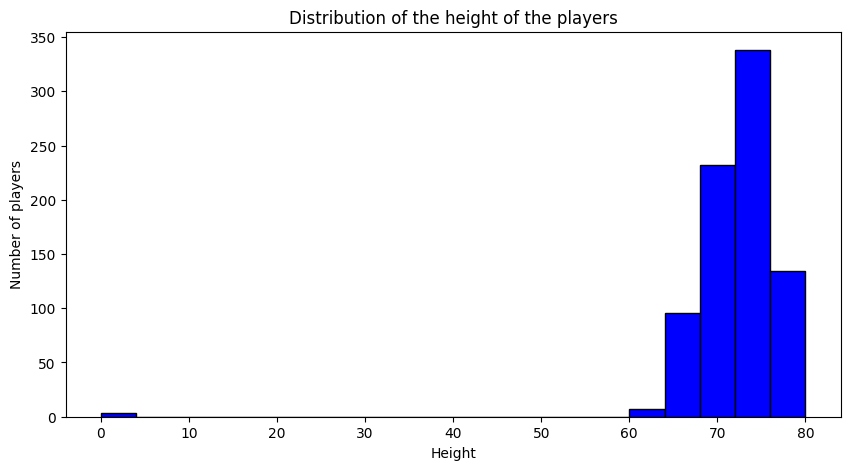

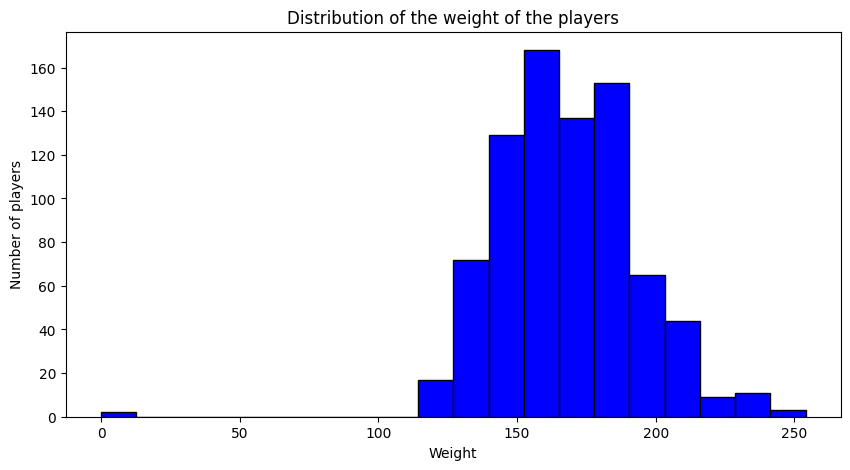

In [6]:
# show the histogram for the weight and height again
plt.figure(figsize=(10, 5))
plt.hist(players['height'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the height of the players')
plt.xlabel('Height')
plt.ylabel('Number of players')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(players['weight'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the weight of the players')
plt.xlabel('Weight')
plt.ylabel('Number of players')
plt.show()


We still see outliers, indicating that there are players with both incorrect height and weight. For those cases we change the height and weight for the average of the other players.

In [7]:
players.loc[players['weight'] < 100, 'weight'] = players[players['weight'] > 100]['weight'].mean()
players.loc[players['height'] < 50, 'height'] = players[players['height'] > 50]['height'].mean()

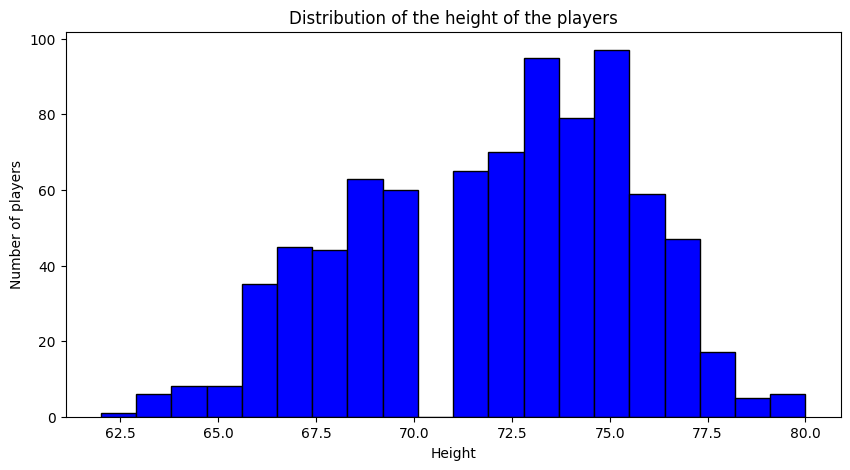

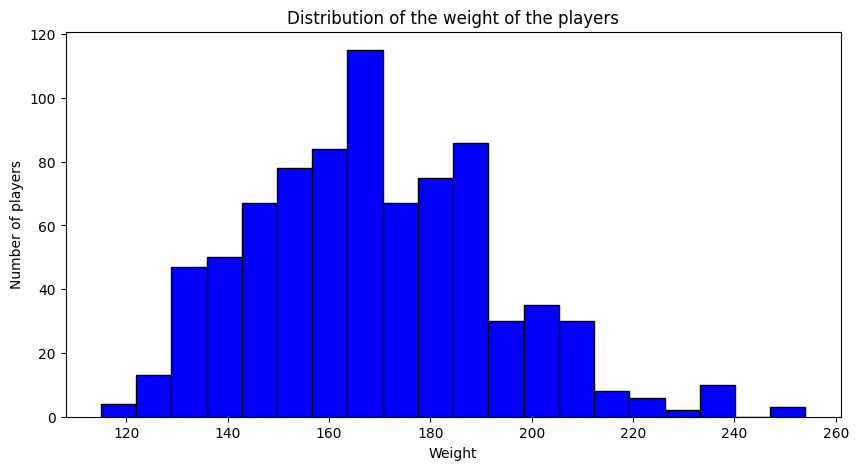

In [8]:
# show graphs again
plt.figure(figsize=(10, 5))
plt.hist(players['height'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the height of the players')
plt.xlabel('Height')
plt.ylabel('Number of players')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(players['weight'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of the weight of the players')
plt.xlabel('Weight')
plt.ylabel('Number of players')
plt.show()

In [9]:
# list all different "college" values ordered
pd.set_option('display.max_rows', None)
print(players['college'].value_counts().sort_index())
pd.reset_option('display.max_rows')  # Reset to default

college
Academy of Sport Moscow           1
Alabama                           7
Alabama-Birmingham                2
Arizona                           5
Arizona State                     6
Arkansas                          4
Arkansas State                    1
Arkansas-Little Rock              1
Auburn                           13
Australian Institute of Sport     2
Baylor                            4
Boise State                       1
Boston College                    4
Brigham Young                     2
Cal State Fullerton               1
California                        6
California-Santa Barbara          1
Central Florida                   1
Central Florida CC                1
Central Michigan                  1
Cincinnati                        2
Clemson                           1
Colorado                          5
Colorado State                    2
Connecticut                      26
DePaul                            7
Delaware                          1
Denver              

We see the names of the college sometimes difer even when it's refering to the same college, like 'Colorado' and 'Colorado State'. Since we are not sure what colleges are equal and which are not, we left this collumn as is, and refrain from using it in the preparation of the model.

In [10]:
# list all different "collegeOther" values ordered
players['collegeOther'].value_counts().sort_index()

collegeOther
Arkansas-Fort Smith (fr-so)      1
Florida                          1
Grayson County (JC)              1
Jefferson College (JC)           1
NE Oklahoma A&M (JC)             1
North Carolina State             1
Scottsdale CC (JC)               1
Southeastern Illinois (fr-so)    1
Texas Christian (fr-jr)          1
Washington                       1
Westark CC                       1
Name: count, dtype: int64

In [11]:
# check for invalid birth dates
players['birthDate'] = pd.to_datetime(players['birthDate'], errors='coerce')
players[players['birthDate'].isnull()]

,bioID,pos,firstseason,lastseason,height,weight,college,collegeOther,birthDate,deathDate,bmi
92,brancli01w,G,0,0,64.000000,146.571952,Texas A&M,NaN,NaT,0000-00-00,0.000000
260,frankba01w,F-C,0,0,72.038414,168.916312,Wisconsin,NaN,NaT,0000-00-00,NaN
463,listr01w,G-F,0,0,70.000000,175.342424,Providence,NaN,NaT,0000-00-00,0.000000
547,morrich01w,F,0,0,72.038414,168.916312,Southern Nazarene,NaN,NaT,0000-00-00,NaN
572,novosna01w,G,0,0,71.000000,165.000000,Notre Dame,NaN,NaT,0000-00-00,23.010315
736,sterkca01w,F,0,0,74.000000,170.000000,Central Michigan,NaN,NaT,0000-00-00,21.824324


There is 5 players with invalid birthdate. This might indicate that their ages are unknown. Since the age is calculated in the preparation phase, we need to put any value in it. So we put the average for now.

In [12]:
# Ensure the 'birthDate' column is in datetime format
players['birthDate'] = pd.to_datetime(players['birthDate'], errors='coerce')

# Calculate the average birthdate (ignoring null values)
average_birth_date = players[players['birthDate'].notnull()]['birthDate'].astype('int64').mean()

# Convert the average timestamp back to a datetime object
average_birth_date = pd.to_datetime(average_birth_date)

# Fill the missing birthDate fields with the calculated average birthDate
players.loc[players['birthDate'].isnull(), 'birthDate'] = average_birth_date


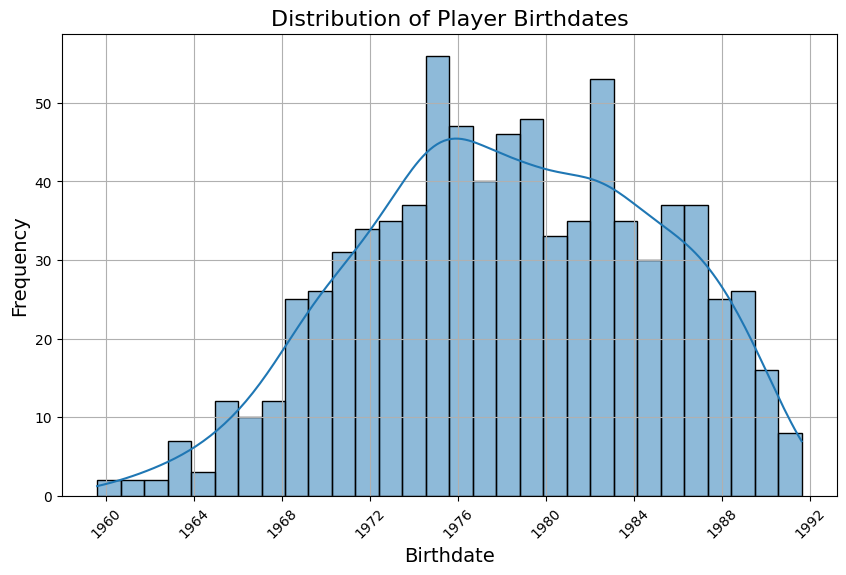

In [13]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram to show the distribution of birthdates
sbn.histplot(players['birthDate'].dropna(), bins=30, kde=True)

# Add titles and labels
plt.title('Distribution of Player Birthdates', fontsize=16)
plt.xlabel('Birthdate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

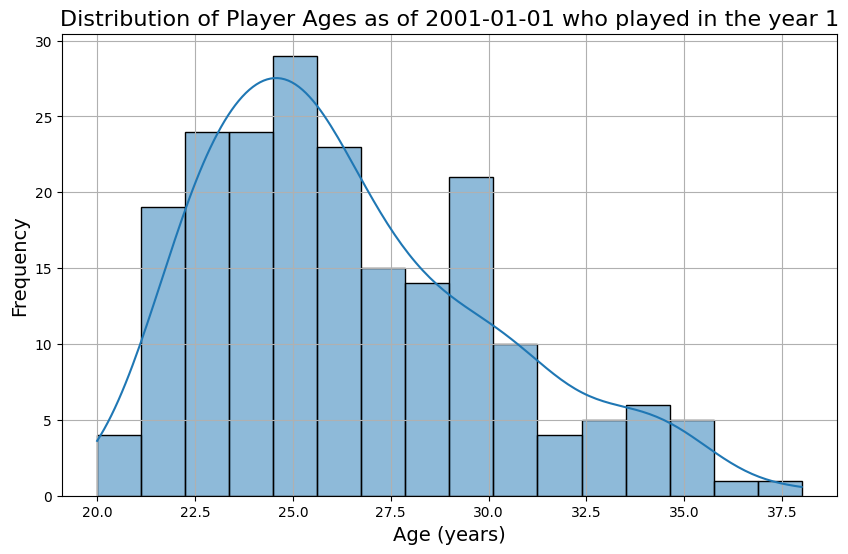

In [14]:
# Specify the year of interest (1 corresponds to the year 2000)
year_of_interest = 1
reference_date = pd.to_datetime('2001-01-01')  # Calculate age as of 2001-01-01

# merge tables players and players_teams : players have 'bioID' and players_teams have 'playerID'
players_in_year = pd.merge(players_teams, players, left_on='playerID', right_on='bioID', how='inner')

# Filter the players who were active in the year of interest
players_in_year = players_in_year[players_in_year['year'] == year_of_interest]

# Calculate age in years
players_in_year['age'] = (reference_date - players_in_year['birthDate']).dt.days // 365.25

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram to show the distribution of ages
sbn.histplot(players_in_year['age'].dropna(), bins=16, kde=True)

# Add titles and labels
plt.title('Distribution of Player Ages as of 2001-01-01 who played in the year 1', fontsize=16)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

# Drop the age column if not needed afterwards
players_in_year.drop('age', axis=1, inplace=True)

In [15]:
# check for invalid death dates with format YYYY-MM-DD
players['deathDate'] = pd.to_datetime(players['deathDate'], errors='coerce')
players[players['deathDate'].isnull()]

C:\Users\marco\AppData\Local\Temp\ipykernel_14660\1412853074.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  players['deathDate'] = pd.to_datetime(players['deathDate'], errors='coerce')


,bioID,pos,firstseason,lastseason,height,weight,college,collegeOther,birthDate,deathDate,bmi
0,abrahta01w,C,0,0,74.0,190.0,George Washington,NaN,1975-09-27,NaT,24.391892
1,abrossv01w,F,0,0,74.0,169.0,Connecticut,NaN,1980-07-09,NaT,21.695946
2,adairje01w,C,0,0,76.0,197.0,George Washington,NaN,1986-12-19,NaT,23.976974
3,adamsda01w,F-C,0,0,73.0,239.0,Texas A&M,Jefferson College (JC),1989-02-19,NaT,31.528805
4,adamsjo01w,C,0,0,75.0,180.0,New Mexico,NaN,1981-05-24,NaT,22.496000
...,...,...,...,...,...,...,...,...,...,...,...
887,zarafr01w,G,0,0,70.0,146.0,NaN,NaN,1976-12-08,NaT,20.946531
888,zellosh01w,G,0,0,70.0,155.0,Pittsburgh,NaN,1986-08-28,NaT,22.237755
889,zhengha01w,C,0,0,80.0,254.0,NaN,NaN,1967-03-07,NaT,27.900313
891,zirkozu01w,G,0,0,69.0,145.0,NaN,NaN,1980-06-06,NaT,21.410418


The invalid date indicates the player hasnt died yet

In [16]:
# check the unique values of the "pos" column
players['pos'].unique()


array(['C', 'F', 'F-C', 'G', 'F-G', 'G-F', 'C-F'], dtype=object)

In [17]:
# check the unique values of the "firstseason" column
print(players['firstseason'].unique())

# check the unique values of the "lastseason" column
print(players['lastseason'].unique())

[0]
[0]


Since the unique values of the 'firstseason' and 'lastseason' is always 0, they offer no advantage to our model, and so we chose to remove them when saving the file at the end.

In [18]:
# lets move on to the teams dataframe, how many teams of each conference qualify to the playoffs
# relevant columns: year, confID(EA or WE), playoff(N or Y)
def print_year_results(year):
    temp_teams = teams[(teams['year'] == year) & (teams['playoff'] == 'Y')]
    count_by_conf = temp_teams.groupby('confID').size()
    count_of_ea_teams = count_by_conf.get('EA', 0)
    count_of_we_teams = count_by_conf.get('WE', 0)
    print(f'Year: {year} EA: {count_of_ea_teams} WE: {count_of_we_teams}')


for i in range(1,11):
    print_year_results(i)

Year: 1 EA: 4 WE: 4
Year: 2 EA: 4 WE: 4
Year: 3 EA: 4 WE: 4
Year: 4 EA: 4 WE: 4
Year: 5 EA: 4 WE: 4
Year: 6 EA: 4 WE: 4
Year: 7 EA: 4 WE: 4
Year: 8 EA: 4 WE: 4
Year: 9 EA: 4 WE: 4
Year: 10 EA: 4 WE: 4


4 teams from each conference qualify to the next playoff each year, as it should.

Lets save the changes to another csv file

In [19]:
# Reload original players data (to represent all players including coaches)
players_with_couches = pd.read_csv('../data/players.csv')


# Identify the removed coaches (those not in the filtered players DataFrame)
removed_coaches = players_with_couches[~players_with_couches['bioID'].isin(players['bioID'])]

# Add the removed coaches back to the current players DataFrame
players = pd.concat([players, removed_coaches], ignore_index=True)

# Drop the 'bmi' column cause its an extra collumn meant to help calculate the replacing values of the weight and height
players = players.drop(columns=['bmi'])
# Drop the "firstseason" and "lastseason" columns
players = players.drop(['firstseason', 'lastseason'], axis=1)

# Save the updated players DataFrame
players.to_csv('../data/clean/players.csv', index=False)

In [20]:
# compare headers and number of lines of both files

clean_players = pd.read_csv('../data/clean/players.csv')
original_players = pd.read_csv('../data/players.csv')

print("(lines, columns)")
print(clean_players.shape)
print(original_players.shape)

(lines, columns)
(893, 8)
(893, 10)


## Table Awards

In [21]:
awards_players

,playerID,award,year,lgID
0,thompti01w,All-Star Game Most Valuable Player,1,WNBA
1,leslili01w,All-Star Game Most Valuable Player,2,WNBA
2,leslili01w,All-Star Game Most Valuable Player,3,WNBA
3,teaslni01w,All-Star Game Most Valuable Player,4,WNBA
4,swoopsh01w,All-Star Game Most Valuable Player,6,WNBA
...,...,...,...,...
90,boltoru01w,WNBA All Decade Team Honorable Mention,7,WNBA
91,holdsch01w,WNBA All Decade Team Honorable Mention,7,WNBA
92,penicti01w,WNBA All Decade Team Honorable Mention,7,WNBA
93,tauradi01w,WNBA All Decade Team Honorable Mention,7,WNBA


We can drop the lgID since it's always the same, and check if there is any typo in the award names.

In [22]:
awards_players = awards_players.drop(['lgID'], axis=1)

In [23]:
print(awards_players['award'].unique())

['All-Star Game Most Valuable Player' 'Coach of the Year'
 'Defensive Player of the Year' 'Kim Perrot Sportsmanship'
 'Kim Perrot Sportsmanship Award' 'Most Improved Player'
 'Most Valuable Player' 'Rookie of the Year' 'Sixth Woman of the Year'
 'WNBA Finals Most Valuable Player' 'WNBA All-Decade Team'
 'WNBA All Decade Team Honorable Mention']


In [24]:
awards_players['award'] = awards_players['award'].replace('Kim Perrot Sportsmanship Award', 'Kim Perrot Sportsmanship')

## Table Teams

We perform similar analysis for the table Teams

In [25]:
teams.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
0,9,WNBA,ATL,ATL,EA,NaN,7,N,0,NaN,...,34,1,16,3,14,2,18,6825,141379,Philips Arena
1,10,WNBA,ATL,ATL,EA,NaN,2,Y,0,L,...,34,12,5,6,11,10,12,6950,120737,Philips Arena
2,1,WNBA,CHA,CHA,EA,NaN,8,N,0,NaN,...,32,5,11,3,13,5,16,6475,90963,Charlotte Coliseum
3,2,WNBA,CHA,CHA,EA,NaN,4,Y,0,W,...,32,11,5,7,9,15,6,6500,105525,Charlotte Coliseum
4,3,WNBA,CHA,CHA,EA,NaN,2,Y,0,L,...,32,11,5,7,9,12,9,6450,106670,Charlotte Coliseum


In [26]:
teams.columns

Index(['year', 'lgID', 'tmID', 'franchID', 'confID', 'divID', 'rank',
       'playoff', 'seeded', 'firstRound', 'semis', 'finals', 'name', 'o_fgm',
       'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_oreb', 'o_dreb',
       'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm',
       'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_oreb', 'd_dreb',
       'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts', 'tmORB',
       'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB', 'won', 'lost',
       'GP', 'homeW', 'homeL', 'awayW', 'awayL', 'confW', 'confL', 'min',
       'attend', 'arena'],
      dtype='object')

In [27]:
print(teams['lgID'].unique())
print(teams['divID'].unique())

['WNBA']
[nan]


In [28]:
teams = teams.drop(['lgID','divID'] , axis=1)

## Table Coaches

In [29]:
coaches.head()

,coachID,year,tmID,lgID,stint,won,lost,post_wins,post_losses
0,adamsmi01w,5,WAS,WNBA,0,17,17,1,2
1,adubari99w,1,NYL,WNBA,0,20,12,4,3
2,adubari99w,2,NYL,WNBA,0,21,11,3,3
3,adubari99w,3,NYL,WNBA,0,18,14,4,4
4,adubari99w,4,NYL,WNBA,0,16,18,0,0


In [30]:
print(coaches['stint'].unique())

[0 1 2]


In [31]:
# drop lgID since its always WNBA for every row
coaches = coaches.drop(['lgID'], axis=1)